In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal
from scipy.constants import pi
import pdb
import pickle

(11, 12)


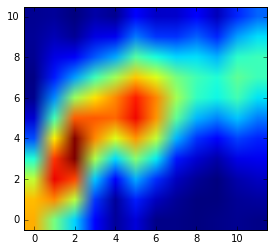

In [15]:
%matplotlib inline

with open('ligo_freq_t.p', 'r') as f:
    spec_data = pickle.load(f)

bins = spec_data['t']
freqs = spec_data['freqs']
spec_H1 = spec_data['spec_H1']

tevent = np.median(bins) 
deltat = .02


row_idx = np.where((freqs >= 50.)*(freqs <250))[0]
col_idx = np.where((bins >= tevent-deltat)*(bins < tevent+deltat))[0]

# note idx2d is a list that consists of two 2d numpy arrays
idx2d = np.meshgrid(row_idx, col_idx)
spec_H1 = spec_H1[idx2d]

sig1, sig2, sig3 = 0.683, 0.955, 0.997
contour_levels = [sig1, sig2, sig3]
extent = [m_arr[0], m_arr[-1], b_arr[0], b_arr[-1] ]

plt.imshow(spec_H1, origin='lower', extent)
plt.show()

In [10]:
#  plot the whitened data, zooming in on the signal region:
tevent = np.median(bins)          # Mon Sep 14 09:50:45 GMT 2015 
deltat = .02                      # seconds around the event
# index into the strain time series for this time interval:
indxt = np.where((bins >= tevent-deltat) & (bins < tevent+deltat))

# ** I added the following line
t = bins[indxt]
print('t: max, min, len', t.max() - tevent, t.min() - tevent, len(t))

# pick a shorter FTT time interval, like 1/16 of a second:
# ** I changed 1/16 to 1/n.
# ** now the frequency is sampled at 16 Hz intervals instead of 1 Hz
# ** this is why we will end up with 129 frequency values, 4096/16,
# ** plus 0 Hz. 
# ** previous cell: n = 8; here n = 16: on small time scales, this is better.
n = 16
fs = 4096.
NFFT = fs/n

# with a lot of overlap, to resolve short-time features:
NOVL = NFFT*15/16
# NOVL = NFFT*7/8

# and choose a window that minimizes "spectral leakage" 
# (https://en.wikipedia.org/wiki/Spectral_leakage)
window = np.blackman(NFFT)

# Plot the H1 whitened spectrogram around the signal
plt.figure()
spec_H1, freqs, bins, im = plt.specgram(strain_H1_whiten[indxt], NFFT=NFFT, Fs=fs, window=window, 
                                        noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat,deltat])
plt.xlabel('time (s) since '+str(tevent))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-0.5, 0.5, 0, 500])
plt.title('aLIGO H1 strain data near GW150914')
# plt.savefig('GW150914_H1_spectrogram_whitened.png')

print('spect_H1.shape', spec_H1.shape)
print('freq:', freqs.max(), freqs.min(), np.gradient(freqs)[0])
# ** bins max and min are set by 20*(1-/2n) and 1/2n.
# ** whereas del_bins = bins[1] - bins[0] is set by bins.max() - bins.min())/(len(bins)-1)
# ** The reason len(bins) is high because the original sampling rate is very high: 16384 Hz.
# ** del_bins = 0.00390625 = 1/256, why??
print('bins:', bins.max(), bins.mean(), bins.min(), bins[1] - bins[0], len(bins), (bins.max() - bins.min())/(len(bins)-1))


# with open('ligo_freq_t.p', 'w') as f:
#     pickle.dump({'spec_H1': spec_H1, 'freqs': freqs, 't': bins}, f )


('t: max, min, len', 0.01953125, -0.01953125, 11)


NameError: name 'strain_H1_whiten' is not defined